In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('./50_Startups.csv')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.shape

(50, 5)

Text(0, 0.5, 'Profit')

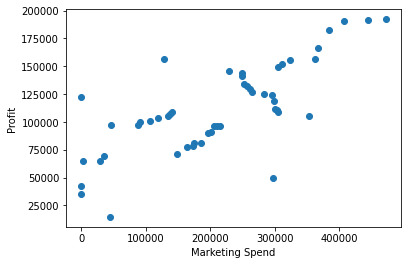

In [11]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

From the above plot, we can say that Marketing Spend is partially correlated with Profit.

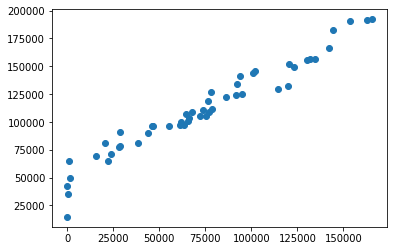

In [12]:
plt.scatter(df['R&D Spend'],df['Profit'])

From the above plot, we can say that R&D spend is strongly correlated with Profit.

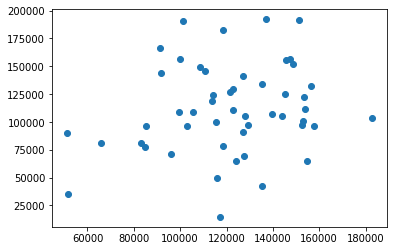

In [13]:
plt.scatter(df['Administration'],df['Profit'])

Administration in any way does not drive the profit.

In [15]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0.5, 1.0, 'Average Profit for different states')

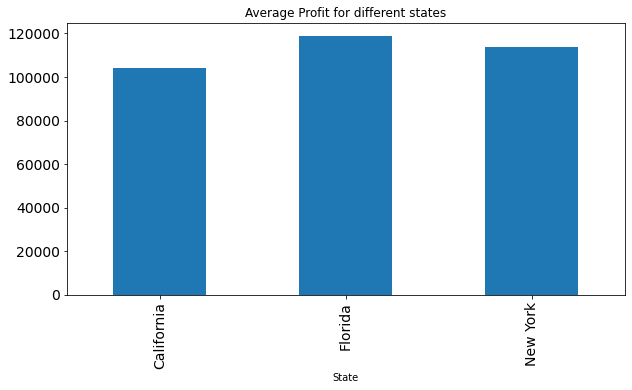

In [21]:
ax = df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10, 5),
    fontsize = 14
)

ax.set_title("Average Profit for different states")

In [22]:
df['State'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

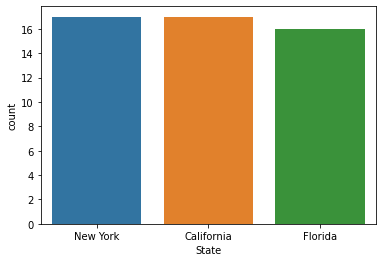

In [26]:
sns.countplot(df['State'])

In [ ]:
#We need to do some treatment for the categorical values

In [27]:
# Create dummy variables for the categorical variable state - ONE HOT ENCODING
df['NewYork_State'] = np.where(df['State']=='New York',1,0)
df['California_State'] = np.where(df['State']=='California',1,0)
df['Florida_State'] = np.where(df['State']=='Florida',1,0)

In [28]:
df.drop(columns=['State'],axis=1,inplace = True)

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [32]:
dependent_variable = 'Profit'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [33]:
independent_variables

['NewYork_State',
 'R&D Spend',
 'Florida_State',
 'Marketing Spend',
 'Administration',
 'California_State']

In [38]:
#CREATE THE DATA OF INDEPENDENT VARIABLES
X = df[independent_variables].values
Y = df[dependent_variable].values

In [39]:
#SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
# 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
X_train

In [41]:
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
#Fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
#Value of c in y=mx + c
regressor.intercept_

44153.95466784859

In [47]:
df[independent_variables]

,NewYork_State,R&D Spend,Florida_State,Marketing Spend,Administration,California_State
0,1,165349.20,0,471784.10,136897.80,0
1,0,162597.70,0,443898.53,151377.59,1
2,0,153441.51,1,407934.54,101145.55,0
3,1,144372.41,0,383199.62,118671.85,0
4,0,142107.34,1,366168.42,91391.77,0
5,1,131876.90,0,362861.36,99814.71,0
6,0,134615.46,0,127716.82,147198.87,1
7,0,130298.13,1,323876.68,145530.06,0
8,1,120542.52,0,311613.29,148718.95,0
9,0,123334.88,0,304981.62,108679.17,1


In [46]:
#COEFFICIENTS FOR VARIABLES - ORDER MATTERS FROM DF[INDEPENDENT_VARIABLES]
regressor.coef_

In [48]:
#PREDICTION on the trained dataset
regressor.predict(X_train)

In [49]:
y_train

In [50]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [51]:
#predicted profit on the test data
y_pred

In [52]:
#Actual profit on the test data
y_test

In [53]:
mean_squared_error(y_test,y_pred)

225690851.26384506

In [54]:
math.sqrt(mean_squared_error(y_test,y_pred))

15023.010725678294

In [55]:
r2_score(y_test,y_pred)

0.8235262062096445